# Logistic Regression Case Study

## Loading Libraries

In [232]:
import pandas as pd
import numpy as np

from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

## Define our Score

In [233]:
def score(estimator,X,y):
        y_pred = estimator.predict(X)
        log_diff = np.log(y_pred+1) - np.log(y+1)
        print('Our Score is:',np.sqrt(np.mean(log_diff**2)))
        return np.sqrt(np.mean(log_diff**2))

## Loading data, Data exploration

In [234]:
df = pd.read_csv('data/Train.csv')

/Users/David/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


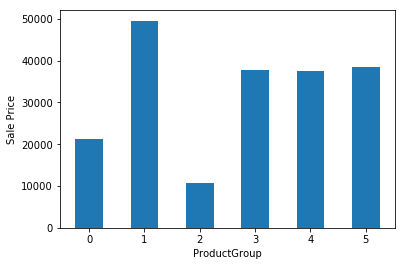

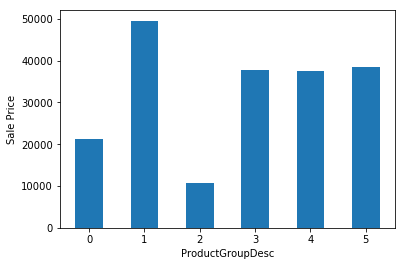

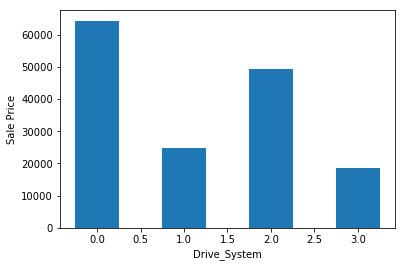

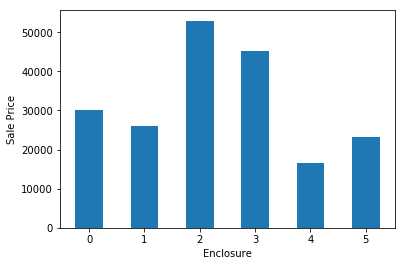

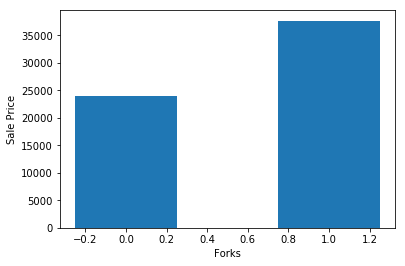

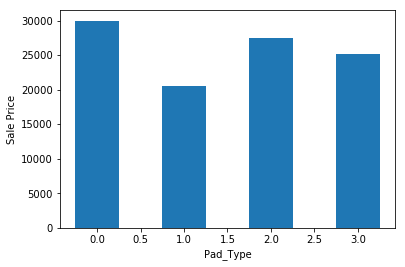

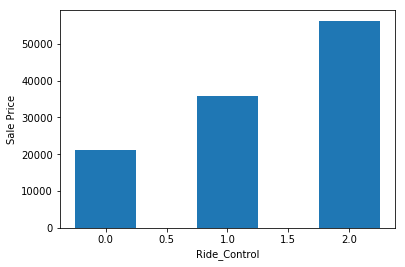

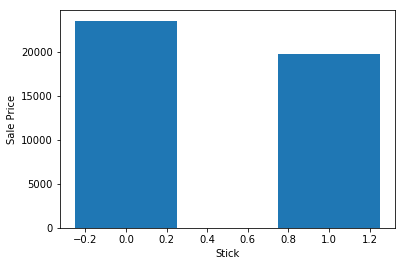

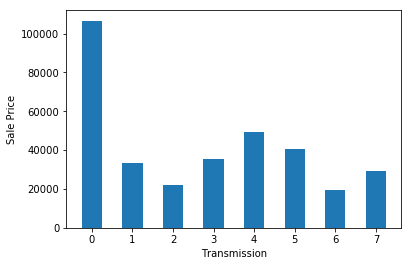

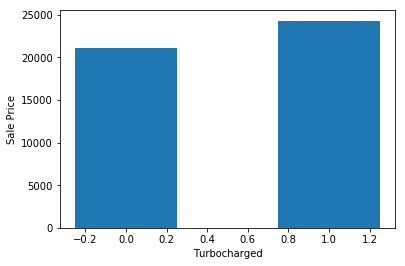

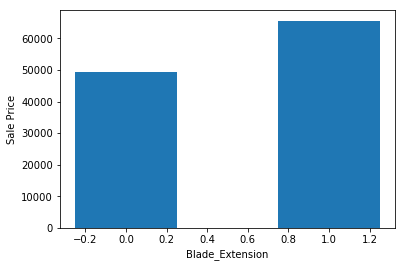

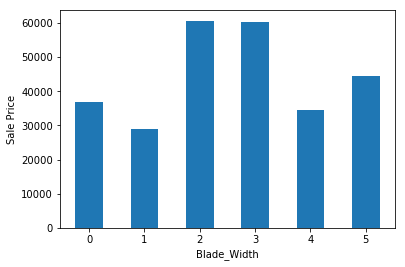

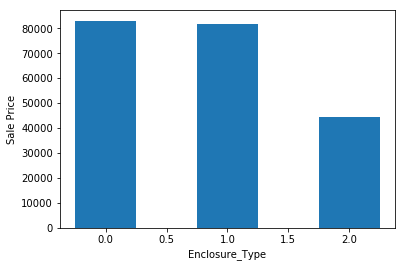

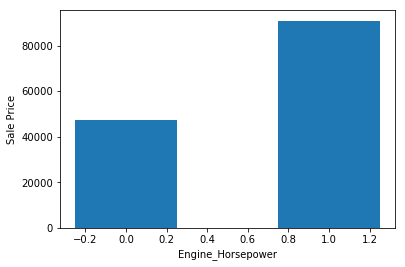

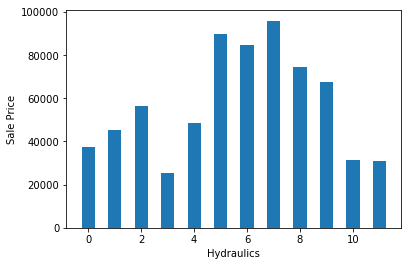

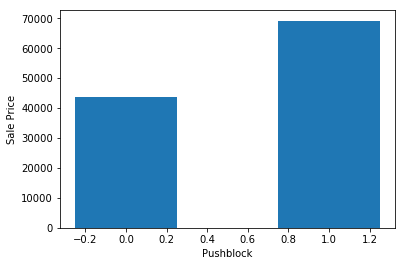

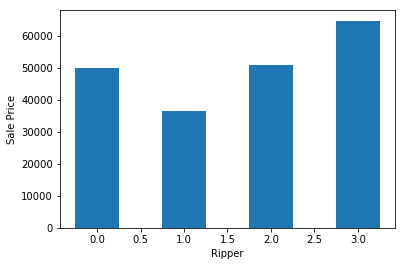

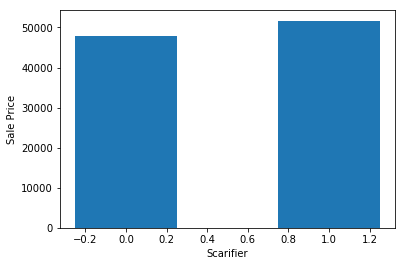

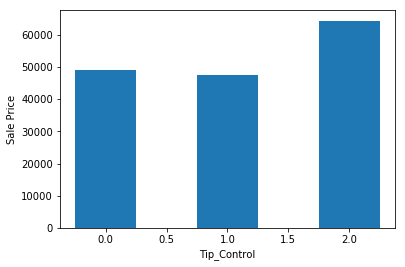

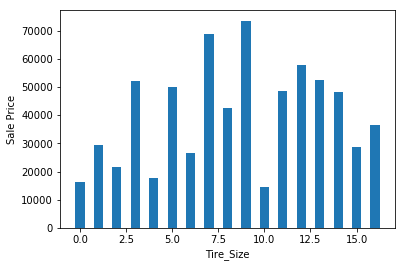

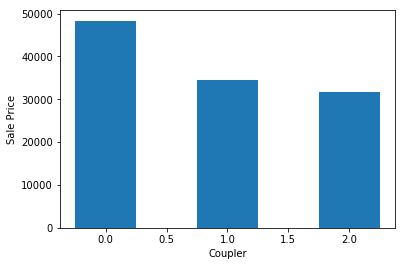

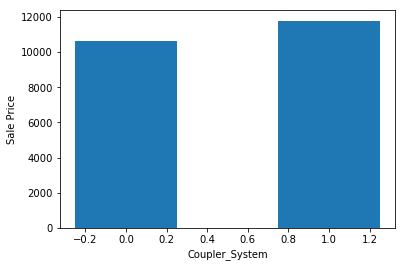

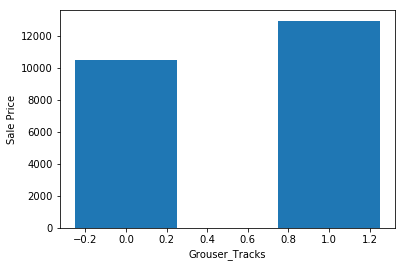

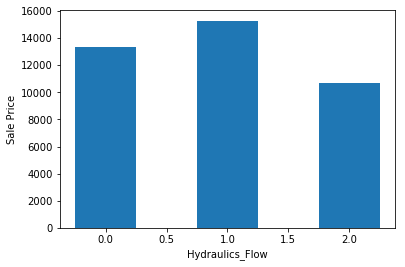

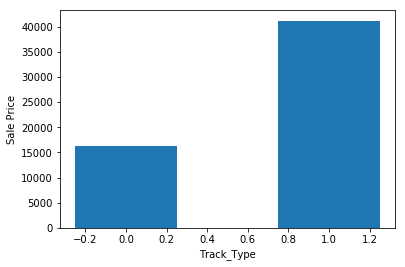

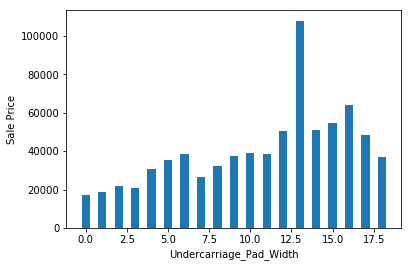

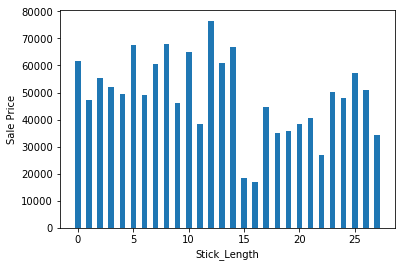

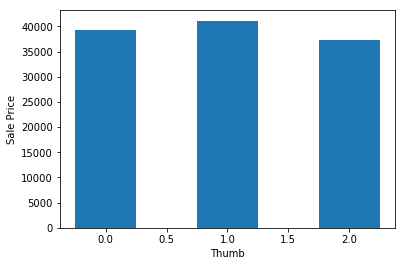

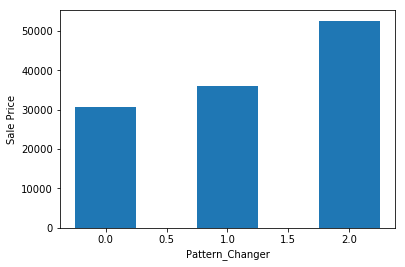

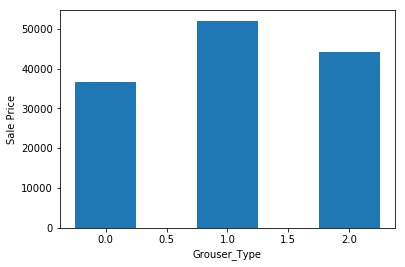

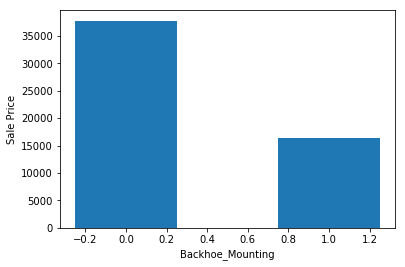

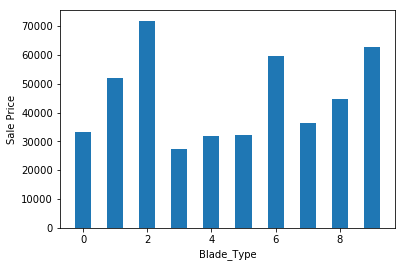

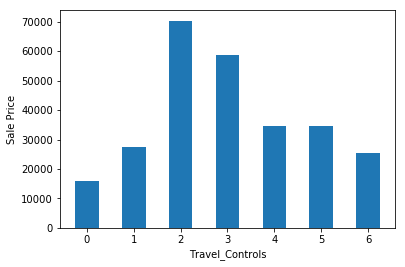

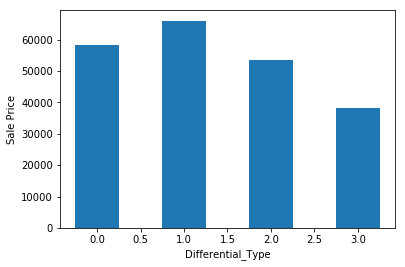

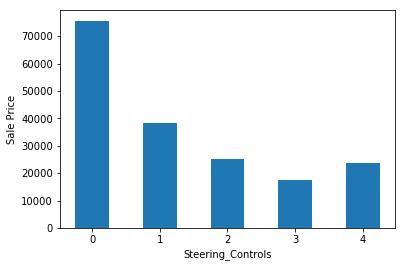

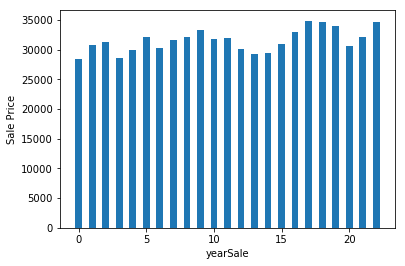

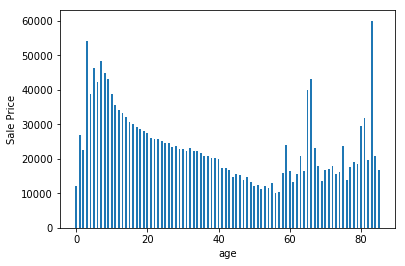

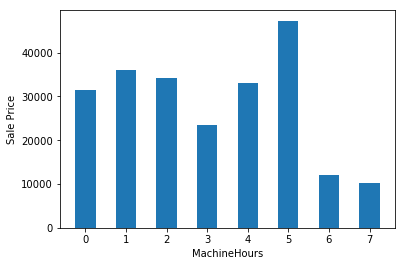

In [249]:
df_plot = df[['ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls', 'yearSale',
       'age', 'MachineHours']]

for col in df_plot.columns:
    agg  = df[['SalePrice', col]].groupby(col, as_index=False).mean()
    plt.bar(range(agg.shape[0]), agg['SalePrice'], width = .5)
    plt.ylabel('Sale Price')
    plt.xlabel(col)
    plt.show()


## Feature Engineering

In [235]:
dftest = pd.read_csv('data/Test.csv')

In [237]:
df.saledate = pd.to_datetime(df.saledate)
df['yearSale'] = df.saledate.apply(lambda x: x.year)
df['age'] = df.yearSale - df.YearMade
df = df[df.age<100]

In [238]:
df.shape

(362940, 55)

In [239]:
#### Feature Engineering
df.MachineHoursCurrentMeter.fillna(0, inplace=True)
bins = [-10,0,360000,2*360000,3*360000,4*360000,5*360000,6*360000,7*360000]
df['MachineHours'] = pd.cut(df['MachineHoursCurrentMeter'], bins, labels = ['A','B','C','D','E','F','G','H'])
df.auctioneerID = df.auctioneerID.astype(str)

## Defining Models to Test

In [255]:
def test_modelRidge(X, y):
    scaler = StandardScaler().fit_transform(X)
    our_score = make_scorer(score, greater_is_better=False)
    linear_model = RidgeClassifier()
    param_space = {'alpha':[0.01, 1, 10]}
    grid_search = GridSearchCV(linear_model, param_space,
    scoring=score, cv=2)
    grid_search.fit(X, y)
    print(grid_search.best_estimator_)
    print(grid_search.best_score_)
    return grid_search

def test_modelLasso(X, y):
    scaler = StandardScaler().fit_transform(X)
    our_score = make_scorer(score, greater_is_better=False)
    linear_model = Lasso()
    param_space = {'alpha':[5, 10]}
    grid_search = GridSearchCV(linear_model, param_space,
    scoring=score, cv=2)
    grid_search.fit(X, y)
    print(grid_search.best_estimator_)
    print(grid_search.best_score_)
    return grid_search

## Choosing features, Cleaning data and Running our Tests

In [257]:
df_filtered2 = df[['SalePrice','age', 'Ride_Control',
                   'ProductGroup','Transmission','Drive_System','Enclosure','Travel_Controls','Steering_Controls','Tire_Size']]
print('Filtering columns ok')
df_filtered2 = pd.get_dummies(df_filtered2)
print('Get Dummies ok')
df_filtered2 = df_filtered2.dropna()
print('DROP NA ok')
y = df_filtered2.pop('SalePrice')
X = df_filtered2.values
print('Starting our Model with: ',X.shape)
test_result = test_modelLasso(X,y)

Filtering columns ok
Get Dummies ok
DROP NA ok
Starting our Model with:  (362940, 57)


/Users/David/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/David/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Our Score is: 0.489493890177


/Users/David/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Our Score is: 0.590985194128


/Users/David/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Our Score is: 0.491299841636


/Users/David/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Our Score is: 0.590364094201
Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
0.5408319679182833


## Model Election:
- Lasso Model (alpha = 10):
```
Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
```

- Score on Test Set:
0.5408319679182833

In [268]:
def predictions(X,model):
    y_pred = model.predict(X)
    return y_pred

## Preparing Test Data and Predictions

In [330]:
dftest.saledate = pd.to_datetime(dftest.saledate)
dftest['yearSale'] = dftest.saledate.apply(lambda x: x.year)
dftest['age'] = dftest.yearSale - df.YearMade
dftest.MachineHoursCurrentMeter.fillna(0, inplace=True)

        
bins = [-10,0,360000,2*360000,3*360000,4*360000,5*360000,6*360000,7*360000]
dftest['MachineHours'] = pd.cut(dftest['MachineHoursCurrentMeter'], bins, labels = ['A','B','C','D','E','F','G','H'])
dftest.auctioneerID = dftest.auctioneerID.astype(str)
dftest_filtered = dftest[['age', 'Ride_Control',
                           'ProductGroup','Transmission','Drive_System',
                          'Enclosure','Travel_Controls',
                          'Steering_Controls','Tire_Size']]
dftest_filtered = pd.get_dummies(dftest_filtered)

print('Get Dummies ok')
dftest_filtered = dftest_filtered.dropna()
for col in dftest.columns:
    if dftest[col].isnull().sum()>0:
        dftest[col].fillna(0, inplace=True)

for col in dftest.columns:
    if dftest[col].isnull().sum()>0:
        dftest[col].fillna(0, inplace=True)

print('DROP NA ok')
ourX = dftest_filtered.values


Get Dummies ok
DROP NA ok


In [340]:
pred = predictions(ourX,test_result.best_estimator_)

In [350]:
file = open('our_results.txt', 'w') 
file.write('SalesID, SalesPrice\n')
for i,p in enumerate(pred):
    file.write('{},{}\n'.format(dftest['SalesID'][i],p))
file.close()